In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/Unified Mentor/colorado_motor_vehicle_sales.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

In [3]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Unified Mentor/colorado_motor_vehicle_sales.csv'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [6]:
df =pd.read_csv('/content/drive/MyDrive/Unified Mentor/colorado_motor_vehicle_sales.csv')

In [7]:
df.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    # Print the shape of the DataFrame
    print(f"Shape of the DataFrame: {df.shape}\n")

    # Print the data types of the DataFrame
    print(f"Data types:\n{df.dtypes}\n")

    # Check for missing values
    print(f"Missing values:\n{df.isnull().sum()}\n")

    # Summary statistics
    print(f"Summary statistics:\n{df.describe(include='all')}\n")

    # For each column
    for column in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Plot a histogram
            plt.figure(figsize=(8, 5))
            sns.histplot(data=df, x=column, kde=True, bins=30)
            plt.title(f"Histogram of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()

        # Check if the column is categorical
        elif df[column].dtype == 'object':
            # Check unique values before plotting
            if df[column].nunique() < 20:  # Avoid clutter for high cardinality
                plt.figure(figsize=(8, 5))
                sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="Set2")
                plt.title(f"Bar plot of {column}")
                plt.xticks(rotation=45)
                plt.xlabel(column)
                plt.ylabel("Count")
                plt.show()
            else:
                print(f"Skipping bar plot for {column} (high cardinality: {df[column].nunique()} unique values)\n")

# Example usage:
# df = pd.read_csv("your_data.csv")
# perform_eda(df)

Shape of the DataFrame: (501, 4)

Data types:
year        int64
quarter     int64
county     object
sales       int64
dtype: object

Missing values:
year       0
quarter    0
county     0
sales      0
dtype: int64

Summary statistics:
               year     quarter county         sales
count    501.000000  501.000000    501  5.010000e+02
unique          NaN         NaN     17           NaN
top             NaN         NaN  Adams           NaN
freq            NaN         NaN     32           NaN
mean    2011.570858    2.502994    NaN  1.760585e+08
std        2.266599    1.120041    NaN  1.642055e+08
min     2008.000000    1.000000    NaN  6.274000e+06
25%     2010.000000    2.000000    NaN  6.148200e+07
50%     2012.000000    3.000000    NaN  1.385820e+08
75%     2014.000000    4.000000    NaN  2.241580e+08
max     2015.000000    4.000000    NaN  9.169100e+08



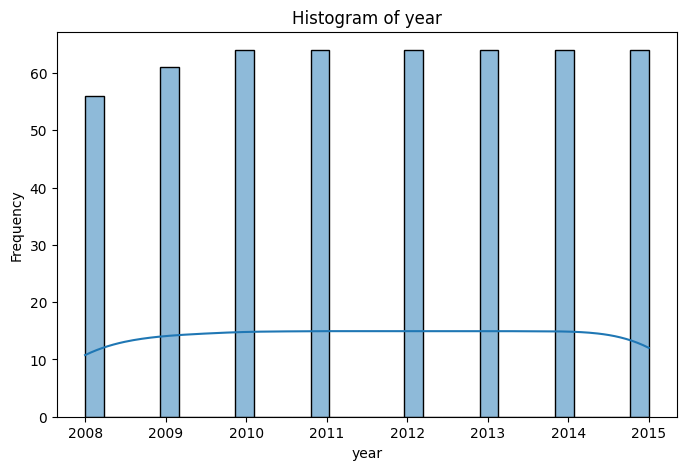

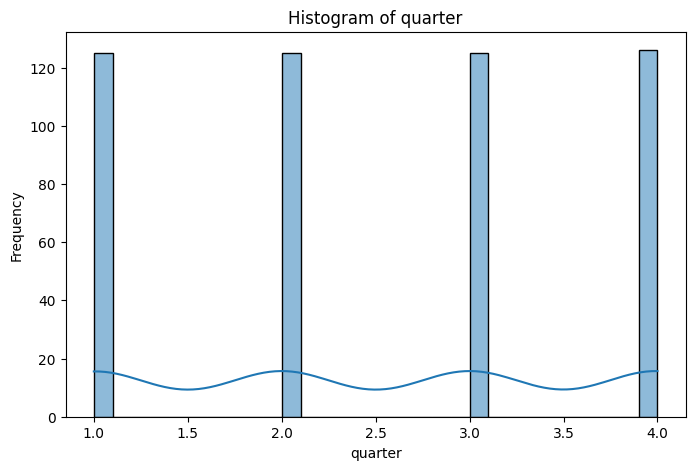

<ipython-input-8-c525a8e02587>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="Set2")


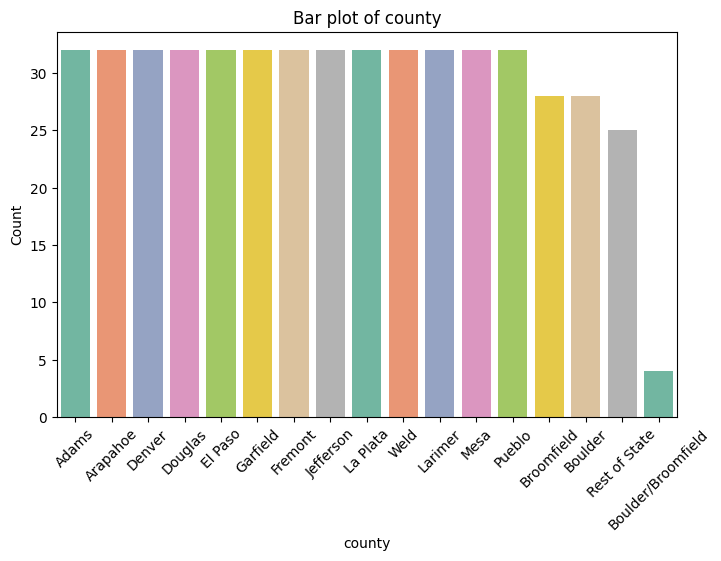

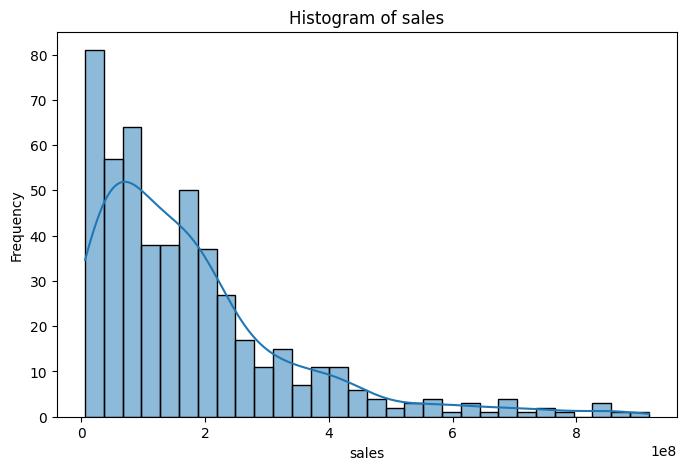

In [9]:
perform_eda(df)

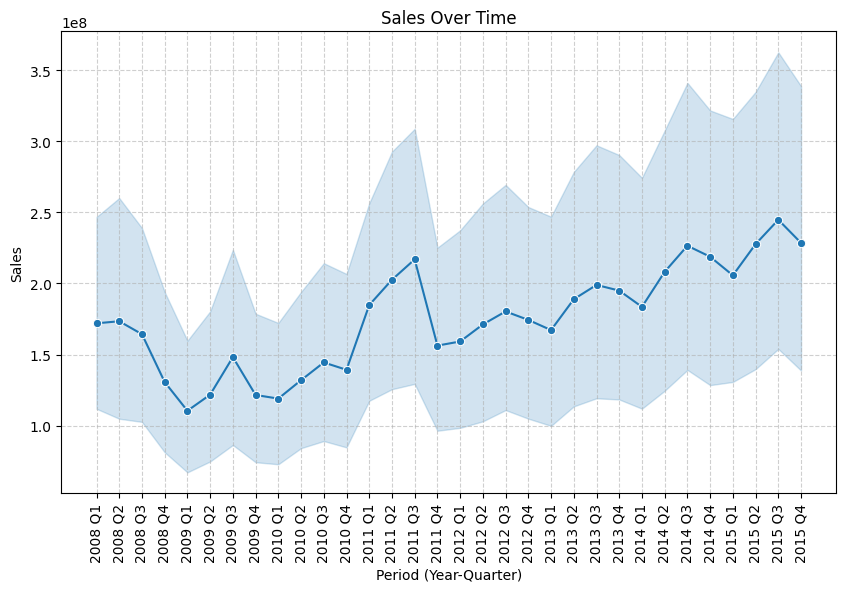

<ipython-input-10-d7c2397f4744>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quarter', y='sales', palette="Set2")


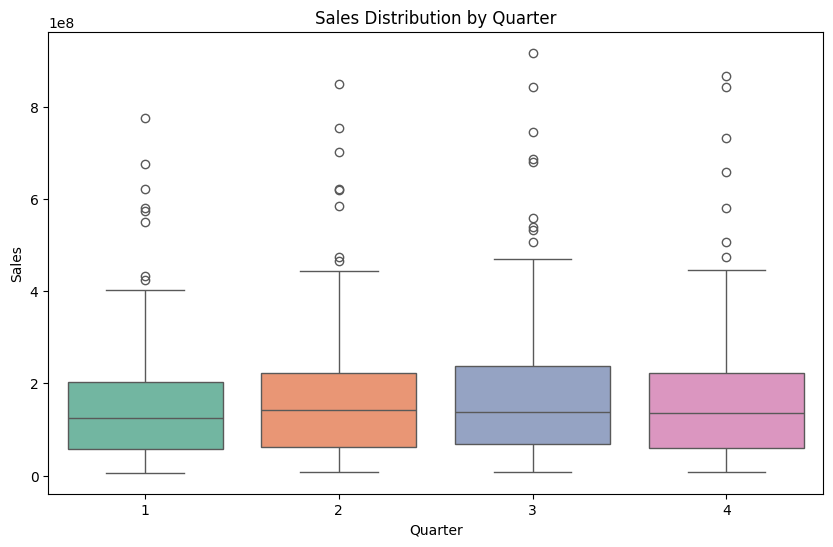

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'year' and 'quarter' exist in the DataFrame
if 'year' in df.columns and 'quarter' in df.columns:
    df['period'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)
else:
    raise KeyError("Columns 'year' and 'quarter' are required in the DataFrame.")

# Convert 'period' to a categorical type for correct sorting
df['period'] = pd.Categorical(df['period'], ordered=True)

# Time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='period', y='sales', marker='o')
plt.title('Sales Over Time')
plt.xlabel('Period (Year-Quarter)')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Box plot by quarter
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quarter', y='sales', palette="Set2")
plt.title('Sales Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

def plot_sales_by_county(df, year, quarter):
    # Filter the DataFrame for the selected year and quarter
    filtered_df = df[(df['year'] == year) & (df['quarter'] == quarter)]

    # Group the data by county and sum the sales
    county_sales = filtered_df.groupby('county')['sales'].sum().reset_index()

    # Sort the counties by sales
    county_sales_sorted = county_sales.sort_values('sales', ascending=False)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=county_sales_sorted, x='county', y='sales', palette='viridis')
    plt.title(f'Sales by County for {year} Q{quarter}')
    plt.xticks(rotation=90)
    plt.ylabel('Total Sales')
    plt.xlabel('County')
    plt.show()

# Ensure year and quarter exist in the DataFrame
if 'year' in df.columns and 'quarter' in df.columns:
    year_widget = widgets.IntSlider(
        min=df['year'].min(), max=df['year'].max(), step=1, description='Year:'
    )
    quarter_widget = widgets.IntSlider(
        min=df['quarter'].min(), max=df['quarter'].max(), step=1, description='Quarter:'
    )

    # Use interact function to create the interactive plot
    widgets.interactive(plot_sales_by_county, df=widgets.fixed(df), year=year_widget, quarter=quarter_widget)

    # Display widgets
    display(year_widget, quarter_widget)
else:
    raise KeyError("Columns 'year' and 'quarter' are required in the DataFrame.")

IntSlider(value=2008, description='Year:', max=2015, min=2008)

IntSlider(value=1, description='Quarter:', max=4, min=1)

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Convert 'county' column to categorical (Ordinal Encoding)
df['county'] = df['county'].astype('category').cat.codes

# Define features and target
X = df[['year', 'quarter', 'county']]
y = df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse}")

RMSE: 20402876.97387048


In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Fit the model with the best parameters
best_model = grid_search.best_estimator_  # Directly retrieve the best model
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 19981856.206187755
